<a href="https://colab.research.google.com/github/Gilmaralexandre/Python-DIO/blob/main/An%C3%A1lise_de_Dados_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados com Pandas Dio


- Objetivo é realizar uma análise exploratória dos dados, obtida pelo arquivo nativo do colab "Adveture Works".
- Nesta análise o foco é reaizar uma análise e tentar descobrir possiveis tendencias no conjunto de dados.
- Posteriormente será realizada a manipulação a fim de criar boas features (variaveis para treinamento de um modelo), e por fim o treinamento do modelo e a performance do mesmo observado com metricas de performance.

### Conhecendo o conjunto de dados

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

In [2]:
# Importando o dataset com o uso da função pd.read_excel
df = pd.read_excel("/content/drive/MyDrive/datasets/AdventureWorks.xlsx")

In [3]:
# Utilizando o head() para visualizar as 5 primeiras linhas, caso o objetivo fosse visualizar as ultimas, poderiamos usar o tail()
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


# Análise Explorátoria de Dados

#                      
## Definições Iniciais 

- Com o intuito de ter um conhecimento mais elaborado sobre o conjunto de dados, e como atuar em cada variavel, vou utilizar um dicionário de dados, que vai estruturar a variavel, o tipo e a descrição no formato de matriz.


#### No contexto de Variaveis, elas são subdivididas em, Numericas (Quantitativas) e Categoricas (Qualitativas), caso for Numerica pode ser Discretas e Continuas.

- Quantitativas Discreta - representdas quando o resultado são valores naturais.Exemplos (N de filhos, N de acessos a plataforma)
- Quantitativas Discretas - representadas quando o numero é referente a valores de ponto flutuante.Exemplos (Altura, Peso, Salário)

- Qualitativa Ordinal - existe ordenação.Exemplos (Escolaridade, Senioridade)
- Qualitativa Nominal - não existe ordenação dentre as categorias.Exemplos (Profossão, Sexo)

In [4]:
# Criando dicionário de dados
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [15]:
dicionário = {
    'Data Venda':["Datetime", "Data"],
    'Data Envio':["Datetime", "Data"],
    'ID Loja':["Inteiro", "Qualitativa Nominal"],
    'ID Produto':["Inteiro", "Qualitativa Nominal"],
    'ID Cliente':["Inteiro", "Qualitativa Nominal"],
    'No. Venda':["Inteiro", "Qualitativa Nominal"],
    'Custo Unitário':["Ponto Flutuante", "Quantitativa Continua"],
    'Preço Unitário':["Ponto Flutuante", "Quantitativa Continua"],
    'Quantidade':["Inteiro", "Quantitativa Discreta"],
    'Valor Desconto':["Ponto Flutuante", "Quantitativa Continua"],
    'Valor Venda':["Ponto Flutuante", "Quantitativa Continua"],
    'Produto':["String", "Quanlitativa Nominal"],
    'Fabricante':["String", "Quanlitativa Ordinal"],
    'Marca':["String", "Quanlitativa Ordinal"],
    'Classe':["String", "Quanlitativa Ordinal"],
    'Cor':["String", "Quanlitativa Nominal"]
}


In [17]:
def DataFrame(dicio):
    dados = {   
        'Variavel' : [x for x in dicionário], #Chaves do dicionário
        'Tipo' : [x[0] for x in dicionário.values()], #Elemento 0 da lista
        'Descrição' : [x[1] for x in dicionário.values()] #Elemento 1 da lista
            }
 
    df = pd.DataFrame(data = dados)
                    
    return df

In [18]:
Dicionário_de_Dados = DataFrame(dicionário)
Dicionário_de_Dados

,Variavel,Tipo,Descrição
0,Data Venda,Datetime,Data
1,Data Envio,Datetime,Data
2,ID Loja,Inteiro,Qualitativa Nominal
3,ID Produto,Inteiro,Qualitativa Nominal
4,ID Cliente,Inteiro,Qualitativa Nominal
5,No. Venda,Inteiro,Qualitativa Nominal
6,Custo Unitário,Ponto Flutuante,Quantitativa Continua
7,Preço Unitário,Ponto Flutuante,Quantitativa Continua
8,Quantidade,Inteiro,Quantitativa Discreta
9,Valor Desconto,Ponto Flutuante,Quantitativa Continua


In [8]:
# Dataset não possui valores faltantes
df is df.isnull()

False

In [9]:
# Qual a receita total?
df["Valor Venda"].sum()

5984606.1426

In [99]:
# Produtos mais vendidos
print("Produtos mais vendidos")
print(df.Produto.value_counts().head(3))
print('*'*30)
print("Produtos menos vendidos")
print(df.Produto.value_counts().tail(3))

Produtos mais vendidos
Adventure Works Laptop15.4W M1548 Black      123
Fabrikam Trendsetter 2/3'' 17mm X100 Grey    118
Adventure Works Laptop15.4W M1548 Red        115
Name: Produto, dtype: int64
******************************
Produtos menos vendidos
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black        89
Headphone Adapter for Contoso Phone E130 Silver    87
Headphone Adapter for Contoso Phone E130 White     85
Name: Produto, dtype: int64


In [102]:
custo_unit = df["Custo Unitário"].sum()
preço_unit = df["Preço Unitário"].sum()
lucro_por_peça = preço_unit - custo_unit

print("O custo unitario de produtos foi de {} dolares, sendo que o preço unitario foi de {} dolares, concluimos que o lucro retirado neste sentido foi de {} dolares".format(custo_unit, preço_unit, lucro_por_peça))

O custo unitario de produtos foi de 245893.55999999997 dolares, sendo que o preço unitario foi de 671245.28 dolares, concluimos que o lucro retirado neste sentido foi de 425351.7200000001 dolares


In [115]:
# Quantidades
print("Maiores Quantidades vendidas")
print(df.Quantidade.value_counts().head(3))
print('*'*30)
print("Menores Quantidades vendidas")
print(df.Quantidade.value_counts().tail(3))

Maiores Quantidades vendidas
6     255
12     75
8      71
Name: Quantidade, dtype: int64
******************************
Menores Quantidades vendidas
1440    1
19      1
1560    1
Name: Quantidade, dtype: int64


In [10]:
# Uma forma de visualizar os tipos das variaveis, valores nulos é utilizando a função df.info
# Tipos inicialmente estão corretos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [12]:
# O describe() traz informações estastiticas do conjunto de dados 
# O describe traz informações como contagem, média, desvio padrao, minimo, maximo, e os quartis de 25, 50, 75 por cento dos valores

df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [11]:
inicio = pd.to_datetime(df['Data Venda']).dt.date.min()
fim = pd.to_datetime(df['Data Venda']).dt.date.max()

print("O inicio das vendas ocorreu no dia {}, e a data dinal das vendas ocorreu no dia {}.".format(inicio, fim))

O inicio das vendas ocorreu no dia 2008-01-02, e a data dinal das vendas ocorreu no dia 2009-12-31.


#### Uma observação sobre os dados estastistico, a coluna quantidade informa valores muitos discrepantes entre a media e a mediana, podendo ser algum informação relevante



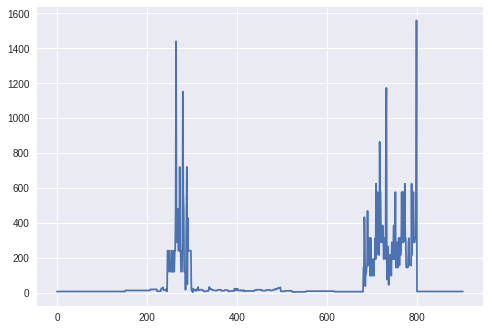

In [ ]:
df.Quantidade.plot() # Demonstra valores bem atipicos

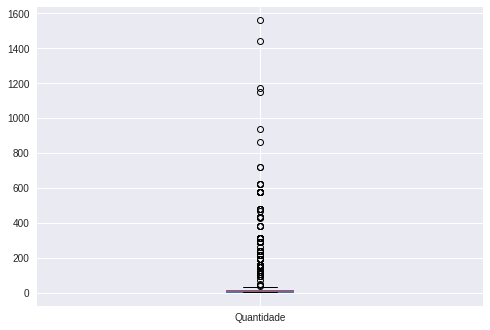

In [ ]:
df.boxplot('Quantidade')

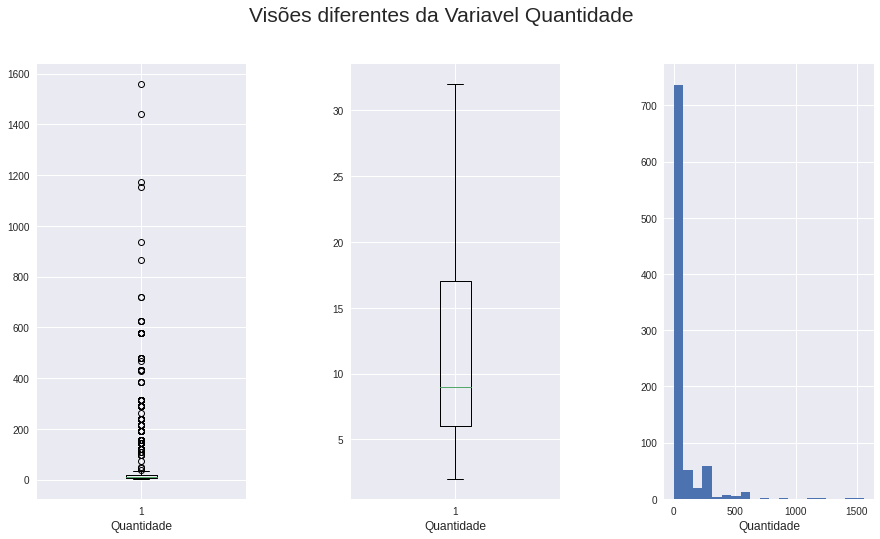

In [45]:
# Vários gráficos numa mesma imagem:

fig = plt.figure(figsize=(15,8)) #tamanho do frame 
plt.subplots_adjust(wspace= 0.5) #espaço entre os graficos
plt.suptitle('Visões diferentes da Variavel Quantidade', fontsize = (21)) #titulo da visão geral (não é o título de cada gráfico)
plt.subplot(1,3,1) #posição do primeiro gráfico (1 linha, 3 colunas, posição 1 )
plt.boxplot(df.Quantidade, meanline = True) #Boxplot normal
plt.xlabel('Quantidade', {'fontsize': 12}) #legenda no eixo x
plt.subplot(1,3,2)
plt.boxplot(df.Quantidade, showfliers=False) #Boxplot sem os outliers
plt.xlabel('Quantidade', {'fontsize': 12})
plt.subplot(1,3,3)
plt.hist(df.Quantidade, bins = 20) #Histograma
plt.xlabel('Quantidade', {'fontsize': 12})
plt.show()

#### Conforme observação acima a variavel possui muitos valores discrepantes, como podemos visualizar no grafico que demonstram  valores elevados e no segundo grafico demonstra varios outliers(valores discrepantes)

In [46]:
# Correlação da variavel Quantidade, demonstra valores altos de correlação negativa com as variaveis df[Custo Unitario] e  df[Preço Unitario]
df.corr()['Quantidade']

ID Loja          -0.011730
ID Produto        0.651302
ID Cliente        0.084098
Custo Unitário   -0.744408
Preço Unitário   -0.719066
Quantidade        1.000000
Valor Desconto   -0.081035
Valor Venda      -0.173476
Name: Quantidade, dtype: float64

- Um possível insight que tivemos com os dados é a possibilidade dos dados estarem com valores atípicos, uma posível solução seria filtrar os outliers e verificar se o comportamento das variaveis se alteram, ou seja o fato de uma variavel impactar no comporatamento de outra, então podemos dizer que existe uma correlação entre as duas.

In [47]:
#Função que calcula todos os componentes do boxplot e assim é possível identificar os outliers a partir do LS e LI.

#vejam que o 1.5 é um parâmetro. Esse valor pode ser alterado por você de acordo com seu estudo. Só esteja ciente que 
#sempre que mudar esse valor, mudamos a quantidade de outliers detectada.

def detecta_outlier(x, limite = 1.5): #Parametros x seria a coluna, e o limite é padrão da biblioteca mas pode ser alterado conforme necessidade
    dq = np.percentile(x, 75) - np.percentile(x, 25) #Criamos a variavel dq, que com a função do numpy np.percentile() pega a porcentagem de um valor. no caso queremos entre 25% e 75% dos valores
    limite_inf = np.maximum(np.percentile(x, 25) - limite * dq, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * dq, np.max(x))
    print("Limite inferior:", limite_inf)
    print("Limite superior:", limite_sup)
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0) #Retorna os limites

In [48]:
outliers = detecta_outlier(df.Quantidade)

Limite inferior: 2.0
Limite superior: 33.5


In [49]:
df['outlier_Quantidade'] = detecta_outlier(df.Quantidade)

Limite inferior: 2.0
Limite superior: 33.5


In [50]:
dados_filtrados = df
dados_filtrados = dados_filtrados[dados_filtrados['outlier_Quantidade']==0]
dados_filtrados.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,outlier_Quantidade
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,0
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,0
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,0
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,0
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,0


In [51]:
Quantitativas = Dicionário_de_Dados[Dicionário_de_Dados['Descrição']=='Quantitativa Continua']
Quantitativas

,Variavel,Tipo,Descrição
6,Custo Unitário,Ponto Flutuante,Quantitativa Continua
7,Preço Unitário,Ponto Flutuante,Quantitativa Continua
9,Valor Desconto,Ponto Flutuante,Quantitativa Continua
10,Valor Venda,Ponto Flutuante,Quantitativa Continua


In [37]:
correlação = df[['Custo Unitário', 'Preço Unitário', 'Valor Desconto', 'Valor Venda', 'Quantidade']]

                Custo Unitário  Preço Unitário  Valor Desconto  Valor Venda  \
Custo Unitário        1.000000        0.944208        0.223897     0.434880   
Preço Unitário        0.944208        1.000000        0.240868     0.489014   
Valor Desconto        0.223897        0.240868        1.000000     0.417466   
Valor Venda           0.434880        0.489014        0.417466     1.000000   
Quantidade           -0.744408       -0.719066       -0.081035    -0.173476   

                Quantidade  
Custo Unitário   -0.744408  
Preço Unitário   -0.719066  
Valor Desconto   -0.081035  
Valor Venda      -0.173476  
Quantidade        1.000000  


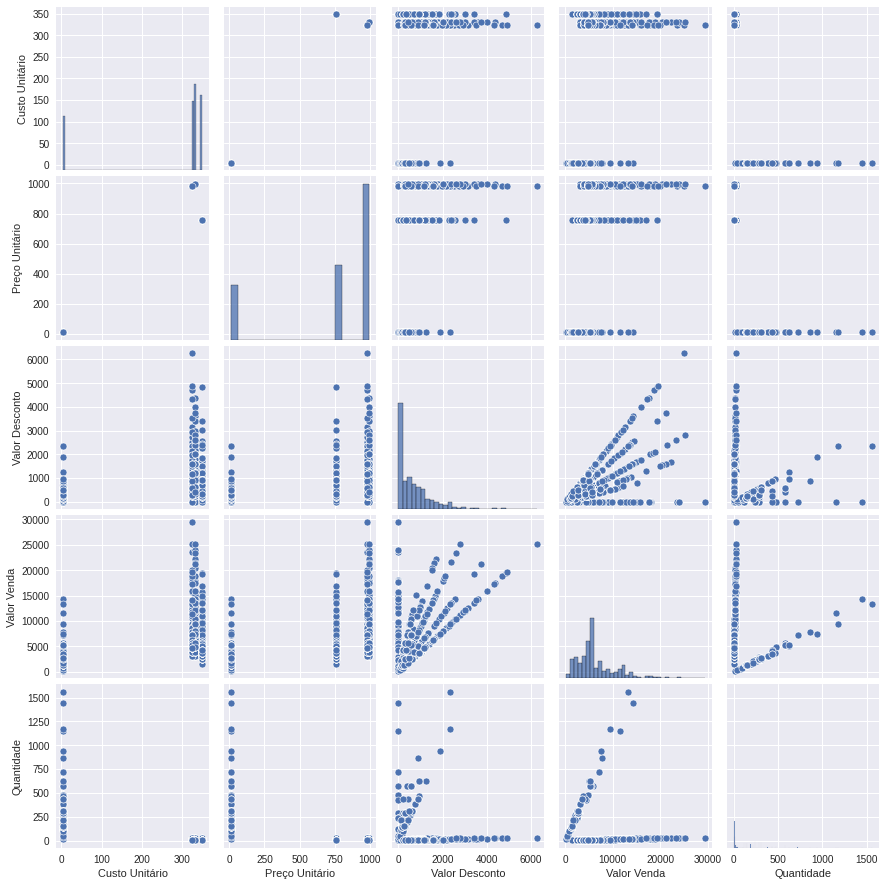

In [41]:
# Observando a representção vizual dos dados e suas correlações
print(correlação.corr())
sns.pairplot(correlação)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e3ca83410>,
      dtype=object)

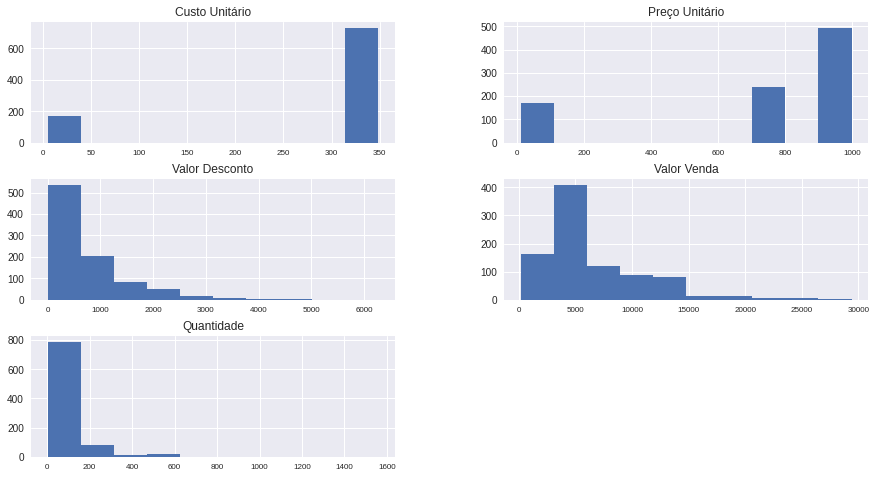

In [42]:
correlação.hist(figsize = [15,8], xlabelsize = 8)

#### Dados sem alteração 

                Custo Unitário  Preço Unitário  Valor Desconto  Valor Venda  \
Custo Unitário        1.000000       -0.346287       -0.026176    -0.090171   
Preço Unitário       -0.346287        1.000000        0.082432     0.249889   
Valor Desconto       -0.026176        0.082432        1.000000     0.357406   
Valor Venda          -0.090171        0.249889        0.357406     1.000000   
Quantidade           -0.051054        0.003624        0.512733     0.944356   

                Quantidade  
Custo Unitário   -0.051054  
Preço Unitário    0.003624  
Valor Desconto    0.512733  
Valor Venda       0.944356  
Quantidade        1.000000  


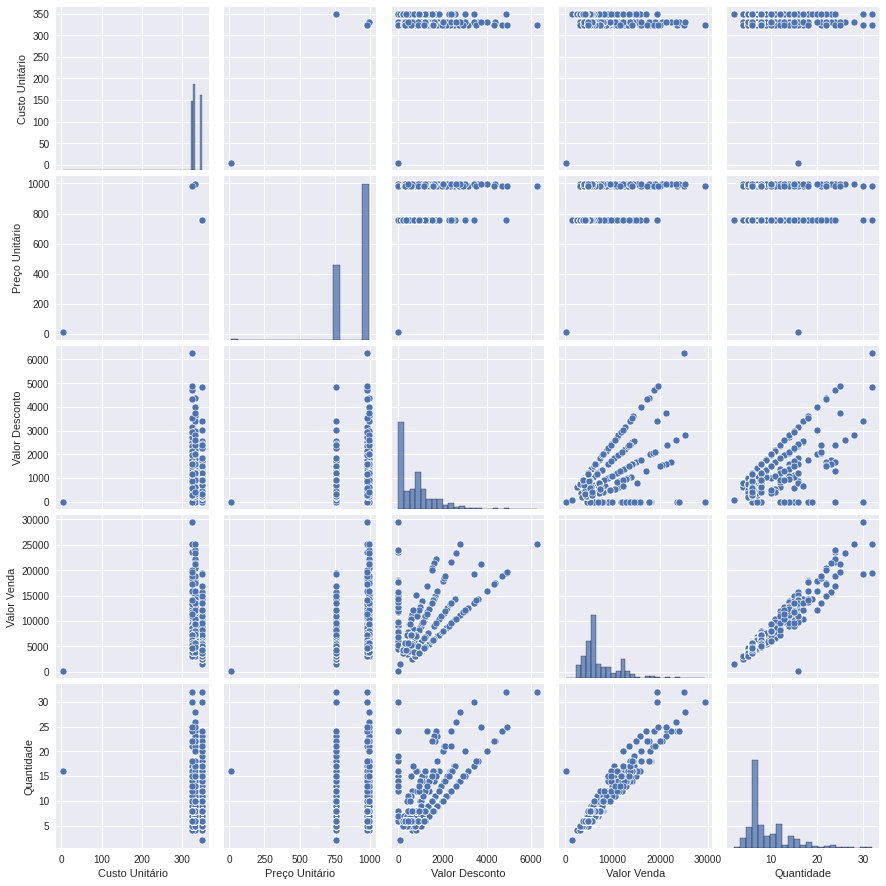

In [53]:
print(correlação2.corr())
sns.pairplot(correlação2)

#### A variavel valor de venda e a variavel quantidade possui uma relação linear, quando os valores discrepantes da quantidade é retirado dos dados

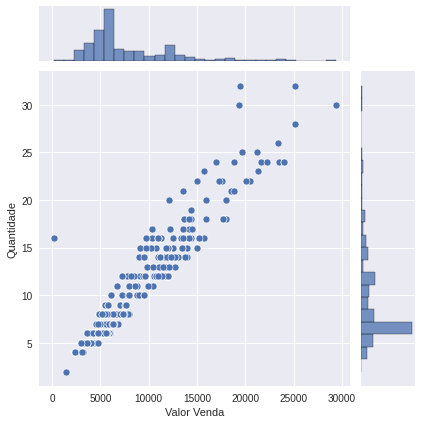

In [54]:
sns.jointplot(data = correlação2, x ='Valor Venda', y='Quantidade')

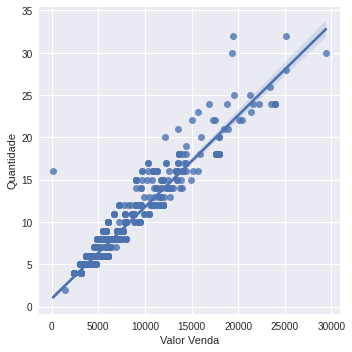

In [56]:
sns.lmplot(data = correlação2, x ='Valor Venda', y='Quantidade')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e3c523ad0>,
      dtype=object)

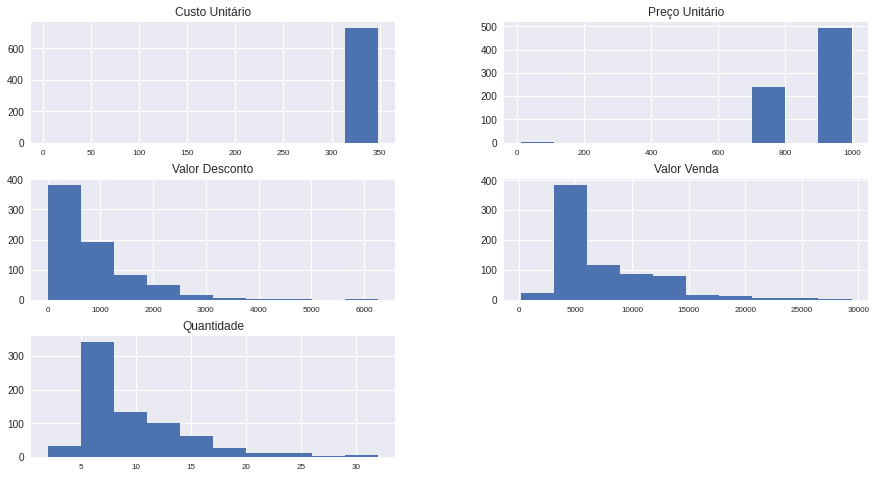

In [52]:
correlação2 = dados_filtrados[['Custo Unitário', 'Preço Unitário', 'Valor Desconto', 'Valor Venda', 'Quantidade']]
correlação2.hist(figsize = [15,8], xlabelsize = 8)

#### Dados Alterados

- Acima plotei uma histograma de todas as variaveis numericas, o primeiro do conjunto de dados completo, e outro com os dados que sem os valores discrepantes da variavel Quantidade, mas não teve um valor que tivesse uma alteração relevante, seguimos as análises.

### Treinamento do modelo

#### Vou realizar uma regressão linear simples, pegando os valore das variaveis Valor de venda como preditora, e a Quantidade como target

In [71]:
X = correlação2['Valor Venda'].values.reshape(-1,1)
y = correlação2['Quantidade'].values.reshape(-1,1)

#### Fatiando os dados em treino e teste

In [72]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lm = LinearRegression () #Instanciando o modelo

In [75]:
lm.fit(X_train, y_train) #Treinando os modelos

LinearRegression()

In [78]:
print('Coeficientes: \n', lm.coef_, '\n Intercepts: \n', lm.intercept_)

Coeficientes: 
 [[0.00109135]] 
 Intercepts: 
 [0.93678527]


In [85]:
ypred = lm.predict(X_train) #Realizando as prediçoes

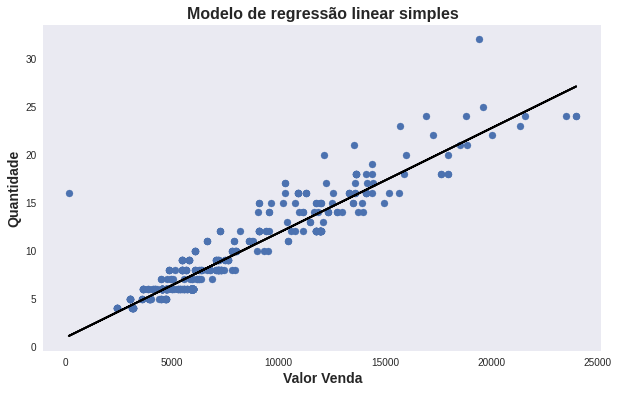

In [87]:
plt.figure(figsize=[10,6])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(X_train, y_train)
plt.xlabel("Valor Venda", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade", fontweight = 'bold', fontsize = 14)
plt.grid()

plt.plot(X_train, ypred, c = 'black', lw = 2)
plt.show()

In [88]:
# Verificando o erro
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [90]:
RMSE(y = y_train, y_pred = ypred) # RMSE compara o valor real e o valor predito

1.6304624237263232

In [79]:
pred = lm.predict(X_test) #Pegando o valor predito em teste, e vendo se o modelo soube generalizar em dados de teste

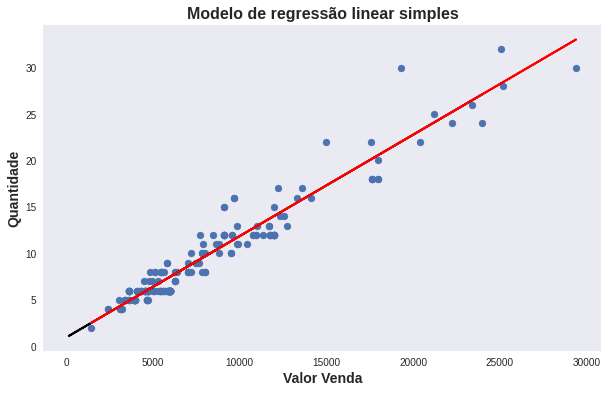

In [91]:
plt.figure(figsize=[10,6])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(X_test, y_test)
plt.xlabel("Valor Venda", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade", fontweight = 'bold', fontsize = 14)
plt.grid()

plt.plot(X_test, pred, c = 'red', lw = 2 )
plt.show()

In [92]:
RMSE(y = y_test, y_pred = pred) # RMSE compara o valor real e o valor predito

1.4416211342489444

#### Modelo teve um bom resultado

In [81]:
# Analisando outras metricas
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred)) 
print('MSE:', metrics.mean_squared_error(y_test, pred)) #Erro medio quadratico
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred))) #Raiz do erro medio quadratico

MAE: 1.078588836841408
MSE: 2.078271494713213
RMSE: 1.4416211342489444


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


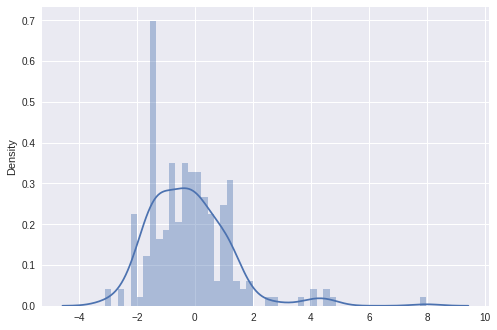

In [82]:
sns.distplot((y_test-pred),bins=50); # Histograma parece estar bem distribuido

## Conclusão



_ Com a análise realizada podemos tirar algumas conclusões sobre o conjunto de dados, como a variavel Quantidade possui valores atipicos com algumas vendas fora do padrao de vendas do local. Sendo assim uma boa variavel para ser explorada, ao realizar a filtragem sem os valores discrepantes, ela demonstrou uma boa relação, principalmente com a variavel Valor de Venda.

_Sendo um bom indicio para prever a quantidade de stoque de produtos, de observar produtos que dão lucro para a empresa, como o valor de revenda, e produtos com uma alta demanda.